In [19]:
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from river import linear_model, preprocessing, metrics, compose

# --- Step 1: Generate synthetic data ---
def generate_synthetic_data(n_days=30):
    data = []
    base_time = datetime(2025, 3, 1, 0)
    for day in range(n_days):
        for hour in range(24):
            ts = base_time + timedelta(days=day, hours=hour)
            # Higher value around 8 PM (20:00)
            clicks = max(0, int(20 + 30 * random.random() - abs(hour - 20) * 4 + random.gauss(0, 2)))
            data.append((ts, clicks))
    return data

data = generate_synthetic_data()

In [21]:
# --- Step 2: Feature extraction ---
def extract_features(ts: datetime):
    return {
        'hour': ts.hour,
        'day_of_week': ts.weekday(),
        'is_weekend': int(ts.weekday() >= 5)
    }

In [23]:
# --- Step 3: Setup model ---
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    linear_model.LinearRegression()
)

mae = metrics.MAE()

In [25]:
# --- Step 4: Train & Evaluate ---
y_true = []
y_pred = []

for ts, y in data:
    x = extract_features(ts)
    y_hat = model.predict_one(x) or 0
    model.learn_one(x, y)
    mae.update(y, y_hat)
    y_true.append(y)
    y_pred.append(y_hat)

print(f'MAE: {mae.get():.2f}')

MAE: 6.59


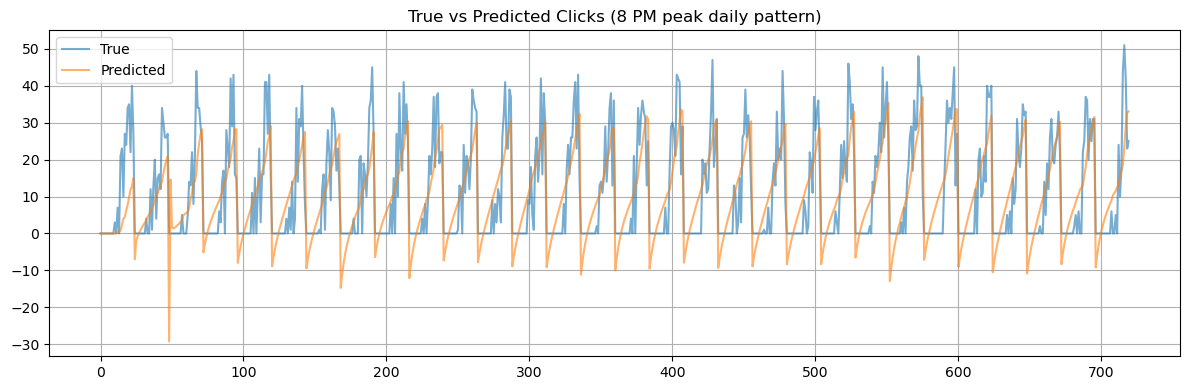

In [27]:
# --- Step 5: Plot ---
plt.figure(figsize=(12, 4))
plt.plot(y_true, label='True', alpha=0.6)
plt.plot(y_pred, label='Predicted', alpha=0.6)
plt.title("True vs Predicted Clicks (8 PM peak daily pattern)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()